# Introduction to AI
## Text and Speech Demos

### Basic Frequency Analysis

#### Load a Text Document

In [1]:
# Use Curl to get a document from GitHub and open it
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Moon.txt -o Moon.txt
doc1 = open("Moon.txt", "r")

# Read the document and print its contents
doc1Txt = doc1.read()
print(doc1Txt)

We set sail on this new sea because there is new knowledge to be gained, and new rights to be won, and they must be won and used for the progress of all people. For space science, like nuclear science and all technology, has no conscience of its own. Whether it will become a force for good or ill depends on man, and only if the United States occupies a position of pre-eminence can we help decide whether this new ocean will be a sea of peace or a new terrifying theater of war. I do not say that we should or will go unprotected against the hostile misuse of space any more than we go unprotected against the hostile use of land or sea, but I do say that space can be explored and mastered without feeding the fires of war, without repeating the mistakes that man has made in extending his writ around this globe of ours.
There is no strife, no prejudice, no national conflict in outer space as yet. Its hazards are hostile to us all. Its conquest deserves the best of all mankind, and its opportu

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
100  1589  100  1589    0     0    529      0  0:00:03  0:00:03 --:--:--   416
100  1589  100  1589    0     0    529      0  0:00:03  0:00:03 --:--:--   416


#### Normalize the Text

In [4]:
from string import punctuation

# remove numeric digits
txt = ''.join(c for c in doc1Txt if not c.isdigit())

# remove punctuation and make lower case
txt = ''.join(c for c in txt if c not in punctuation).lower()

# print the normalized text
print (txt)

we set sail on this new sea because there is new knowledge to be gained and new rights to be won and they must be won and used for the progress of all people for space science like nuclear science and all technology has no conscience of its own whether it will become a force for good or ill depends on man and only if the united states occupies a position of preeminence can we help decide whether this new ocean will be a sea of peace or a new terrifying theater of war i do not say that we should or will go unprotected against the hostile misuse of space any more than we go unprotected against the hostile use of land or sea but i do say that space can be explored and mastered without feeding the fires of war without repeating the mistakes that man has made in extending his writ around this globe of ours
there is no strife no prejudice no national conflict in outer space as yet its hazards are hostile to us all its conquest deserves the best of all mankind and its opportunity for peaceful

#### Get the Frequency Distribution

In [5]:
import nltk
import pandas as pd
from nltk.probability import FreqDist
nltk.download("punkt")

# Tokenize the text into individual words
words = nltk.tokenize.word_tokenize(txt)

# Get the frequency distribution of the words into a data frame
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']
print (count_frame)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\羅子嘉\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


           Count
we             9
set            1
sail           1
on             2
this           5
...          ...
accept         1
unwilling      1
postpone       1
intend         1
win            1

[152 rows x 1 columns]


#### Plot the distribution as a pareto chart

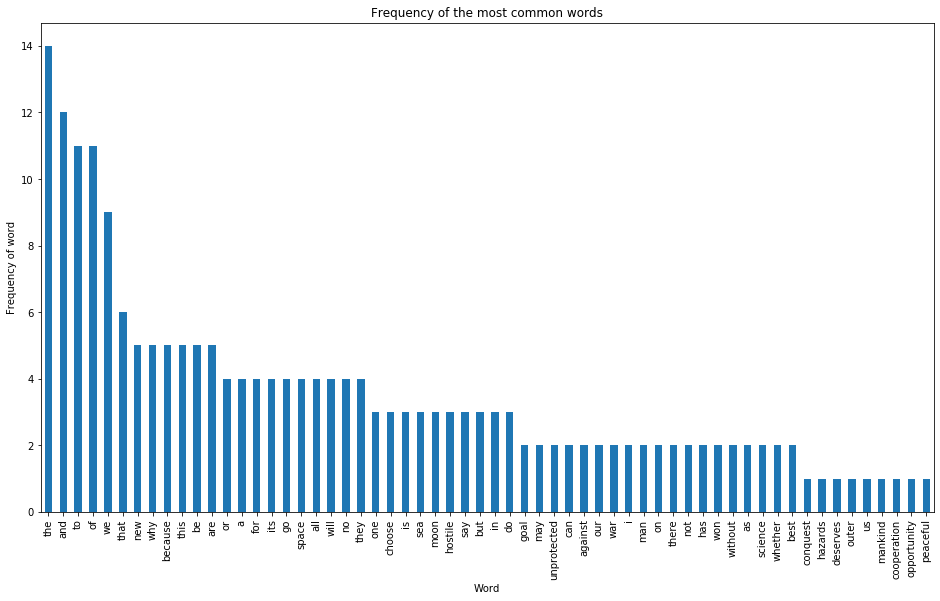

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Sort the data frame by frequency
counts = count_frame.sort_values('Count', ascending = False)

# Display the top 60 words as a bar plot
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

#### Remove stop words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\羅子嘉\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


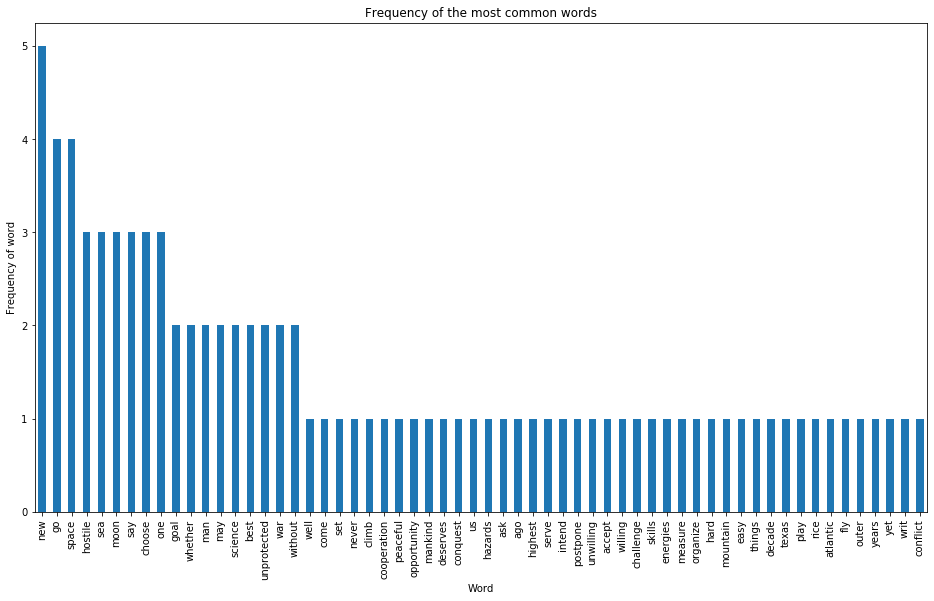

In [7]:
# Get standard stop words from NLTK
nltk.download("stopwords")
from nltk.corpus import stopwords

# Filter out the stop words
txt = ' '.join([word for word in txt.split() if word not in (stopwords.words('english'))])

# Get the frequency distribution of the remaining words
words = nltk.tokenize.word_tokenize(txt)
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot the frequency of the top 60 words
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

### Term Frequency - Inverse Document Frequency
#### View the documents

In [7]:
# remind ourselves of the first document
print(doc1Txt)
print("------------------------------------------------")

# Get a second document, normalize it, and remove stop words
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Gettysburg.txt -o Gettysburg.txt
doc2 = open("Gettysburg.txt", "r")
doc2Txt = doc2.read()
print (doc2Txt)
from string import punctuation
txt2 = ''.join(c for c in doc2Txt if not c.isdigit())
txt2 = ''.join(c for c in txt2 if c not in punctuation).lower()
txt2 = ' '.join([word for word in txt2.split() if word not in (stopwords.words('english'))])


# and a third
print("------------------------------------------------")
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Cognitive.txt -o Cognitive.txt
doc3 = open("Cognitive.txt", "r")
doc3Txt = doc3.read()
print (doc3Txt)
from string import punctuation
txt3 = ''.join(c for c in doc3Txt if not c.isdigit())
txt3 = ''.join(c for c in txt3 if c not in punctuation).lower()
txt3 = ' '.join([word for word in txt3.split() if word not in (stopwords.words('english'))])


We set sail on this new sea because there is new knowledge to be gained, and new rights to be won, and they must be won and used for the progress of all people. For space science, like nuclear science and all technology, has no conscience of its own. Whether it will become a force for good or ill depends on man, and only if the United States occupies a position of pre-eminence can we help decide whether this new ocean will be a sea of peace or a new terrifying theater of war. I do not say that we should or will go unprotected against the hostile misuse of space any more than we go unprotected against the hostile use of land or sea, but I do say that space can be explored and mastered without feeding the fires of war, without repeating the mistakes that man has made in extending his writ around this globe of ours.
There is no strife, no prejudice, no national conflict in outer space as yet. Its hazards are hostile to us all. Its conquest deserves the best of all mankind, and its opportu

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1455  100  1455    0     0   1455      0  0:00:01 --:--:--  0:00:01  2217


Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal.
Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We are met on a great battlefield of that war.
We have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this.
But, in a larger sense, we can not dedicate, we can not consecrate, we can not hallow this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract.
The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   630  100   630    0     0    630      0  0:00:01 --:--:--  0:00:01  1153


#### Get TF-IDF Values for the top three words in each document

In [8]:
# install textblob library and define functions for TF-IDF
!pip install -U textblob
import math
from textblob import TextBlob as tb

def tf(word, doc):
    return doc.words.count(word) / len(doc.words)

def contains(word, docs):
    return sum(1 for doc in docs if word in doc.words)

def idf(word, docs):
    return math.log(len(docs) / (1 + contains(word, docs)))

def tfidf(word, doc, docs):
    return tf(word,doc) * idf(word, docs)


# Create a collection of documents as textblobs
doc1 = tb(txt)
doc2 = tb(txt2)
doc3 = tb(txt3)
docs = [doc1, doc2, doc3]

# Use TF-IDF to get the three most important words from each document
print('-----------------------------------------------------------')
for i, doc in enumerate(docs):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, doc, docs) for word in doc.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:3]:
        print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))


-----------------------------------------------------------
Top words in document 1
	Word: space, TF-IDF: 0.01193
	Word: go, TF-IDF: 0.01193
	Word: sea, TF-IDF: 0.00894
Top words in document 2
	Word: nation, TF-IDF: 0.01662
	Word: dedicated, TF-IDF: 0.01329
	Word: great, TF-IDF: 0.00997
Top words in document 3
	Word: services, TF-IDF: 0.02134
	Word: microsoft, TF-IDF: 0.01423
	Word: cognitive, TF-IDF: 0.01423


You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Stemming

#### View frequency of unstemmed words from Kennedy's inauguration speech

Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens:

We observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn before you and Almighty God the same solemn oath our forebears prescribed nearly a century and three-quarters ago.
The world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.
We dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new generation of A

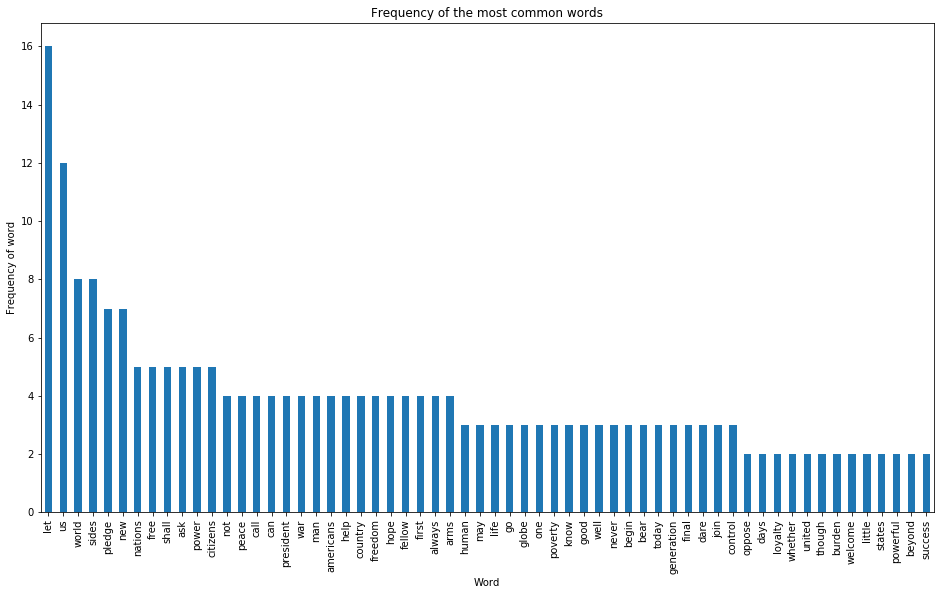

In [14]:
# Load and print text
#!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/KennedyInaugural.txt -o KennedyInaugural.txt
doc4 = open("KennedyInaugural.txt", "r", encoding='utf-8-sig')
kenTxt = doc4.read()

print(kenTxt)

# Normalize and remove stop words
from string import punctuation
kenTxt = ''.join(c for c in kenTxt if not c.isdigit())
kenTxt = ''.join(c for c in kenTxt if c not in punctuation).lower()
kenTxt = ' '.join([word for word in kenTxt.split() if word not in (stopwords.words('english'))])

# Get Frequency distribution
words = nltk.tokenize.word_tokenize(kenTxt)
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot frequency
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

#### Stem the words using the Porter stemmer

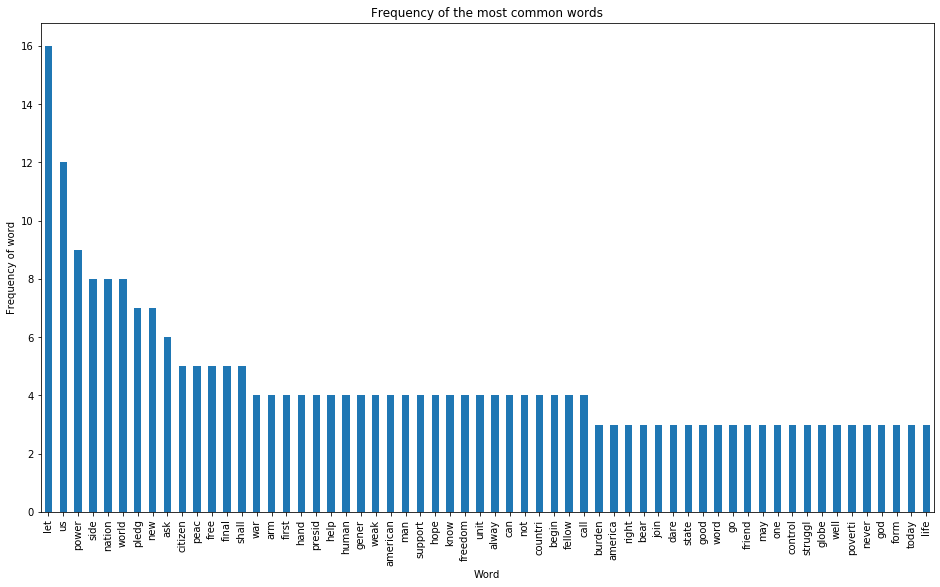

In [15]:
from nltk.stem.porter import PorterStemmer

# Get the word stems
ps = PorterStemmer()
stems = [ps.stem(word) for word in words]

# Get Frequency distribution
fdist = FreqDist(stems)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot frequency
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

### Linguistic Analytics

https://azure.microsoft.com/en-us/services/cognitive-services/linguistic-analysis-api/

#### Use the Linguistics Analytics API

import http.client, urllib.request, urllib.parse, urllib.error, base64, json

myText = input('Please enter some text: \n')

headers = {
    # Request headers
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': 'YOUR_KEY_HERE',
}

params = urllib.parse.urlencode({
})

body = {
    "language" : "en",
    "analyzerIds" : ["4fa79af1-f22c-408d-98bb-b7d7aeef7f04", "22a6b758-420f-4745-8a3c-46835a67c0d2"],
    "text" : myText
}

try:
    conn = http.client.HTTPSConnection('westus.api.cognitive.microsoft.com')
    conn.request("POST", "/linguistics/v1.0/analyze?%s" % params, str(body), headers)
    response = conn.getresponse()
    data = response.read()
    parsed = json.loads(data)
    for analyzer in parsed:
        print("Analyzer: " + analyzer["analyzerId"])
        print(analyzer["result"])
        print("---------------------------")
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))



### Text Analytics
#### Create a Text Analytics service in Azure
https://portal.azure.com

#### Get the region-specific URI and Key

In [16]:
textAnalyticsURI = 'westus2.api.cognitive.microsoft.com'
textKey = '4396222e51d5450d9595b2360e6e7b87'

#### Analyze the Gettysburg and Cognitive documents

In [17]:
import http.client, urllib.request, urllib.parse, urllib.error, base64, json, urllib

# Define the request headers.
headers = {
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': textKey,
    'Accept': 'application/json'
}

# Define the parameters
params = urllib.parse.urlencode({
})

# Define the request body
body = {
  "documents": [
    {
        "language": "en",
        "id": "1",
        "text": doc2Txt
    },
    {
        "language": "en",
        "id": "2",
        "text": doc3Txt
    }
  ]
}

try:
    # Execute the REST API call and get the response.
    conn = http.client.HTTPSConnection(textAnalyticsURI)
    conn.request("POST", "/text/analytics/v2.0/keyPhrases?%s" % params, str(body), headers)
    response = conn.getresponse()
    data = response.read().decode("UTF-8")

    # 'data' contains the JSON response, which includes a collection of documents.
    parsed = json.loads(data)
    for document in parsed['documents']:
        print("Document " + document["id"] + " key phrases:")
        for phrase in document['keyPhrases']:
            print("  " + phrase)
        print("---------------------------")
    conn.close()

except Exception as e:
    print('Error:')
    print(e)

Document 1 key phrases:
  new nation
  people
  honored dead
  great civil war
  great battlefield
  great task
  living
  increased devotion
  measure of devotion
  brave men
  new birth of freedom
  government
  fathers
  final resting place
  proposition
  continent
  Liberty
  God
  world
  little note
  score
  years
  cause
  larger sense
  poor power
  unfinished work
  portion
  lives
  ground
  earth
---------------------------
Document 2 key phrases:
  Microsoft Cognitive Services
  speech
  developers
  services available
  applications
  set of APIs
  vision recognition
  intelligent features
  Microsoft's evolving portfolio of machine learning APIs
  personal computing experiences
  enhanced productivity
  emotion
  video detection
  SDKs
  language understanding
  systems
  reason
---------------------------


#### Perform sentiment analysis

In [18]:
body = {
  "documents": [
    {
      "language": "en",
      "id": "1",
      "text": "Wow! cognitive services are fantastic."
    },
    {
      "language": "en",
      "id": "2",
      "text": "I hate it when computers don't understand me."
    }
  ]
}


try:
    conn = http.client.HTTPSConnection(textAnalyticsURI)
    conn.request("POST", "/text/analytics/v2.0/sentiment?%s" % params, str(body), headers)
    response = conn.getresponse()
    data = response.read().decode("UTF-8")
    parsed = json.loads(data)
    
    # Get the numeric score for each document
    for document in parsed['documents']:
        sentiment = "negative"
        
        # if it's more than 0.5, consider the sentiment to be positive.
        if document["score"] >= 0.5:
            sentiment = "positive"
        print("Document:" + document["id"] + " = " + sentiment)
    conn.close()
    
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))



Document:1 = positive
Document:2 = negative


### Speech
#### Create a Bing Speech API service
https://portal.azure.com
#### Get the service key

In [ ]:
speechKey = 'YOUR_KEY_HERE'

#### Install SpeechRecognition package
https://pypi.python.org/pypi/SpeechRecognition

In [ ]:
!pip install SpeechRecognition
!pip install pyaudio

#### Convert speech to text

In [ ]:
import speech_recognition as sr

# Read the audio file
r = sr.Recognizer()
with sr.Microphone() as source:
    print("Say something!")
    audio = r.listen(source)

# transcribe speech using the Bing Speech API
try:
    transcription = r.recognize_bing(audio, key=speechKey)
    print("Here's what I heard:")
    print('"' + transcription + '"')
    
except sr.UnknownValueError:
    print("The audio was unclear")
except sr.RequestError as e:
    print (e)
    print("Something went wrong :-(; {0}".format(e))


#### Convert text to speech

In [ ]:
import IPython
import http.client, urllib.parse, json
from xml.etree import ElementTree

# Get the input text
myText = input('What would you like me to say?: \n')

# The Speech API requires an access token (valid for 10 mins)
apiKey = speechKey
params = ""
headers = {"Ocp-Apim-Subscription-Key": apiKey}
AccessTokenHost = "api.cognitive.microsoft.com"
path = "/sts/v1.0/issueToken"

# Use the API key to request an access token
conn = http.client.HTTPSConnection(AccessTokenHost)
conn.request("POST", path, params, headers)
response = conn.getresponse()
data = response.read()
conn.close()
accesstoken = data.decode("UTF-8")

# Now that we have a token, we can set up the request
body = ElementTree.Element('speak', version='1.0')
body.set('{http://www.w3.org/XML/1998/namespace}lang', 'en-us')
voice = ElementTree.SubElement(body, 'voice')
voice.set('{http://www.w3.org/XML/1998/namespace}lang', 'en-US')
voice.set('{http://www.w3.org/XML/1998/namespace}gender', 'Male')
voice.set('name', 'Microsoft Server Speech Text to Speech Voice (en-US, JessaRUS)')
voice.text = myText
headers = {"Content-type": "application/ssml+xml", 
           "X-Microsoft-OutputFormat": "riff-16khz-16bit-mono-pcm", 
           "Authorization": "Bearer " + accesstoken, 
           "X-Search-AppId": "07D3234E49CE426DAA29772419F436CA", 
           "X-Search-ClientID": "1ECFAE91408841A480F00935DC390960", 
           "User-Agent": "TTSForPython"}

#Connect to server to synthesize a wav from the text
conn = http.client.HTTPSConnection("speech.platform.bing.com")
conn.request("POST", "/synthesize", ElementTree.tostring(body), headers)
response = conn.getresponse()
data = response.read()
conn.close()

#Play the wav
IPython.display.Audio(data, autoplay=True)

### Translation

#### Create a Microsoft Text Translation Service
https://portal.azure.com

#### Get the service key

In [ ]:
transTextKey = "YOUR_KEY_HERE"

#### Translate Text

In [ ]:
import requests, http.client, urllib.request, urllib.parse, urllib.error, base64, json, urllib
from xml.etree import ElementTree


textToTranslate = input('Please enter some text: \n')
fromLangCode = input('What language is this?: \n') 
toLangCode = input('To what language would you like it translated?: \n') 

try:
    # Connect to server to get the Access Token
    apiKey = transTextKey
    params = ""
    headers = {"Ocp-Apim-Subscription-Key": apiKey}
    AccessTokenHost = "api.cognitive.microsoft.com"
    path = "/sts/v1.0/issueToken"

    conn = http.client.HTTPSConnection(AccessTokenHost)
    conn.request("POST", path, params, headers)
    response = conn.getresponse()
    data = response.read()
    conn.close()
    accesstoken = "Bearer " + data.decode("UTF-8")


    # Define the request headers.
    headers = {
        'Authorization': accesstoken
    }

    # Define the parameters
    params = urllib.parse.urlencode({
        "text": textToTranslate,
        "to": toLangCode,
        "from": fromLangCode
    })

    # Execute the REST API call and get the response.
    conn = http.client.HTTPSConnection("api.microsofttranslator.com")
    conn.request("GET", "/V2/Http.svc/Translate?%s" % params, "{body}", headers)
    response = conn.getresponse()
    data = response.read()
    translation = ElementTree.fromstring(data.decode("utf-8"))
    print (translation.text)

    conn.close()
    
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

### Language Understanding Intelligence Service (LUIS)

#### Provision LUIS
https://portal.azure.com

#### Create a LUIS App
https://www.luis.ai/

Home automation app with a *Light* entity and the following intents:
- Light On
- Light Off


In [ ]:
%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image
import requests
from io import BytesIO
import json 

# Set up API configuration
endpointUrl = "https://eastus.api.cognitive.microsoft.com/luis/v2.0/apps/7306b6e8-0656-41c1-8dd9-2af977be639d?subscription-key=f181418faa3b4ec6aa753c518d9699a4&verbose=true&timezoneOffset=0&q="

# prompt for a command
command = input('Please enter a command: \n')

# Call the LUIS service and get the JSON response
endpoint = endpointUrl + command.replace(" ","+")
response = requests.get(endpoint)
data = json.loads(response.content.decode("UTF-8"))

# Identify the top scoring intent
intent = data["topScoringIntent"]["intent"]
if (intent == "Light On"):
    img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/LightOn.jpg'
elif (intent == "Light Off"):
    img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/LightOff.jpg'
else:
    img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Dunno.jpg'

# Get the appropriate image and show it
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)
